# 03 Data Preparation

Mission: Convert raw, messy, misaligned, incomplete, possibly biased data into a purified modeling-ready dataset well structured, encoded, clean, and insightful.

### Objective:

To create a clean, structured, and relevant dataset ready for modeling by:

- Removing irrelevant data

- Cleaning missing/erroneous entries

- Engineering new features

- Transforming variables for consistency

- Reducing noise

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np


### Loading the raw data

In [95]:
file_path = r"C:\Users\Levis\Documents\moringaproject\Project\CODED_DATA(paper).csv"
df = pd.read_csv(file_path)

### 1. Missing Values Analysis & Treatment

 - Quantifying missing values,

- Visualizing them,

- Deciding how to handle them.

In [96]:
# Step 1: Quantify missing values
missing_summary = df.isnull().sum()
missing_percentage = df.isnull().mean() * 100

missing_df = pd.DataFrame({
    "Missing Count": missing_summary,
    "Missing %": missing_percentage
}).query("`Missing Count` > 0").sort_values("Missing %", ascending=False)

# Step 2: Visualize missing values
if not missing_df.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_df.index, y=missing_df["Missing %"], palette="viridis")
    plt.title("Missing Value Percentage per Column", fontsize=14)
    plt.ylabel("Missing Percentage (%)")
    plt.xlabel("Columns")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


### 2 Outlier Detection & Treatment Plan

- Visualize outliers using boxplots,

- Flag high-leverage variables (GOAL, RA_total, PBC_total, etc.),

- Recommend treatment options (e.g., capping, log transform)

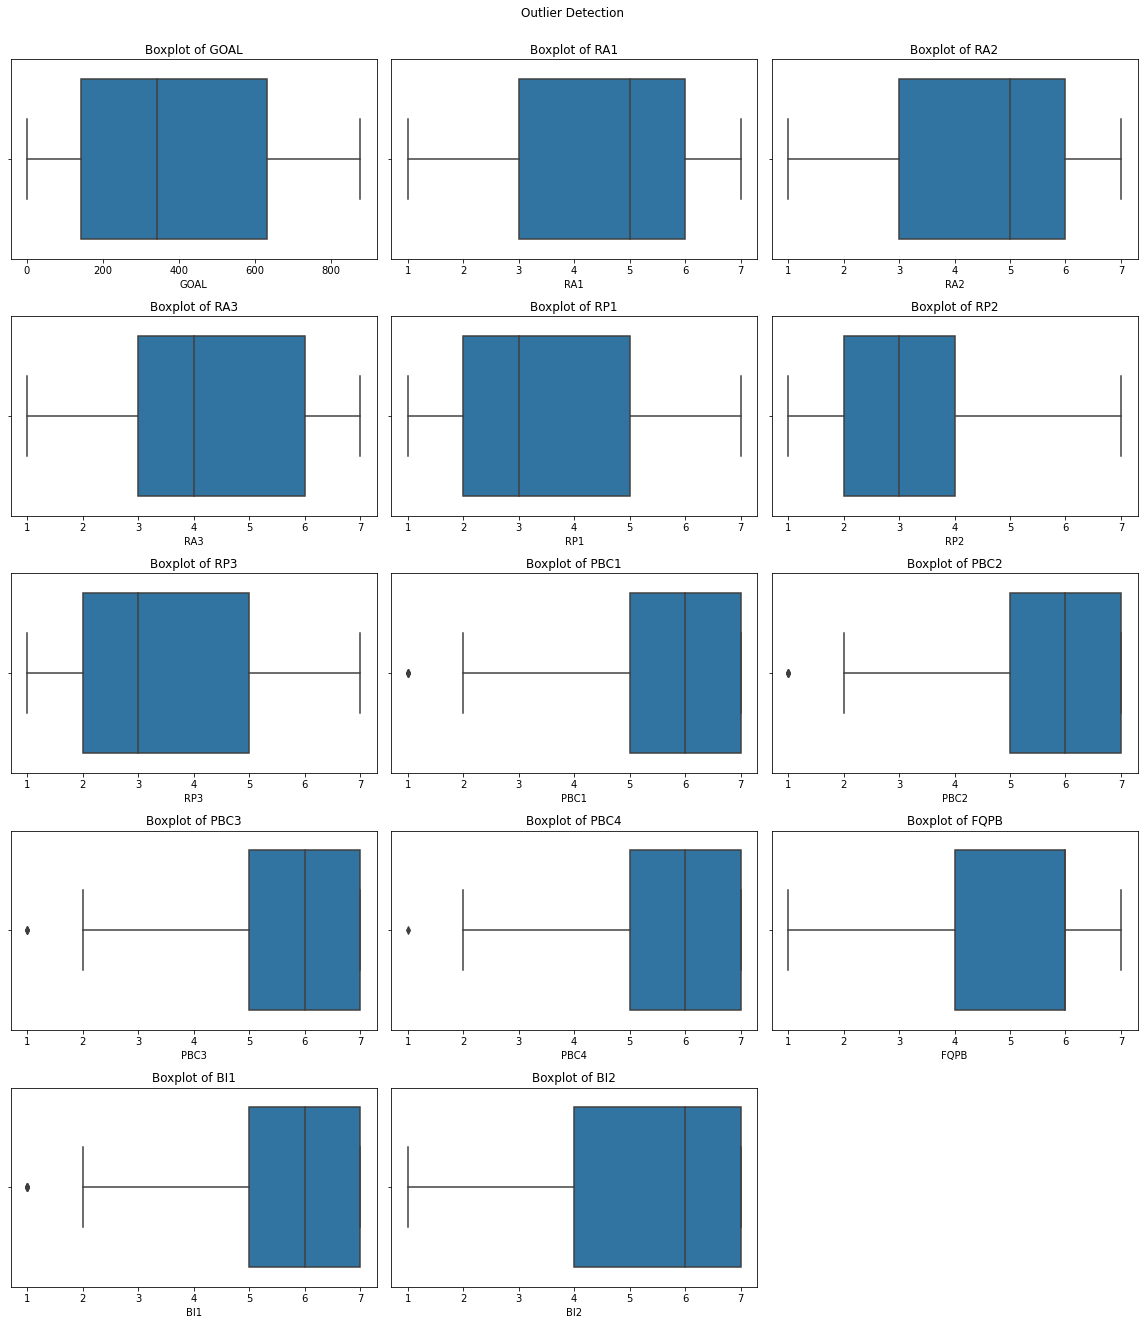

In [97]:
outlier_features = ['GOAL', 'RA1', 'RA2', 'RA3', 'RP1', 'RP2', 'RP3',
                    'PBC1', 'PBC2', 'PBC3', 'PBC4', 'FQPB', 'BI1', 'BI2']

plt.figure(figsize=(16, 18))
for i, feature in enumerate(outlier_features, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.tight_layout()
plt.suptitle("Outlier Detection", y=1.02)
plt.show()




### 3. Feature Engineering 

- To create aggregate scores from grouped psychological indicators

In [104]:
# Step 3: Feature Engineering — create aggregate scores from grouped psychological indicators
df["RA_total"] = df[["RA1", "RA2", "RA3"]].sum(axis=1)
df["RP_total"] = df[["RP1", "RP2", "RP3"]].sum(axis=1)
df["PBC_total"] = df[["PBC1", "PBC2", "PBC3", "PBC4"]].sum(axis=1)
df["BI_total"] = df[["BI1", "BI2"]].sum(axis=1)

# Show outcome of the newly created aggregated features
df[["RA_total", "RP_total", "PBC_total", "BI_total"]].describe()


,RA_total,RP_total,PBC_total,BI_total
count,423.000000,423.000000,423.000000,423.000000
mean,12.874704,9.309693,22.789598,10.853428
std,4.567129,4.780101,4.558798,2.913814
min,3.000000,3.000000,7.000000,2.000000
25%,10.000000,5.000000,19.000000,9.000000
50%,12.000000,9.000000,24.000000,12.000000
75%,16.000000,13.000000,27.000000,13.000000
max,21.000000,21.000000,28.000000,14.000000


#### Distribution Insights:

- All four new features are well-distributed and bounded, ideal for modeling.




### 4. Feature Scaling & Categorical Encoding

- To scale numerical variables (GOAL, RA_total, etc.)

- To encode categorical ones (GENDER, EDUCATION, OCCUPATION, MARITAL_STATUS)

In [106]:

# Feature Scaling 
scaler = StandardScaler()
features_to_scale = ['GOAL', 'RA_total', 'RP_total', 'PBC_total', 'BI_total', 'FQPB']
df[[f"{col}_scaled" for col in features_to_scale]] = scaler.fit_transform(df[features_to_scale])


# Categorical Encoding

categorical_cols = ['GENDER', 'EDUCATION', 'OCCUPATION', 'MARITAL_STATUS']

for col in categorical_cols:
    le = LabelEncoder()
    df[col + "_encoded"] = le.fit_transform(df[col])


### Exporting the Cleaned Dataset

In [107]:
# Export to your local directory (adjust the path as needed)
export_path = "CODED_DATA_cleaned_transformed.csv" 
df_fe_scaled.to_csv(export_path, index=False)

print(f"Dataset exported to: {export_path}")



Dataset exported to: CODED_DATA_cleaned_transformed.csv


The engineered dataset include 

- Scaled Numerical Features:
GOAL_scaled, RA_total_scaled, RP_total_scaled, PBC_total_scaled, BI_total_scaled, FQPB_scaled

- Encoded Categorical Features:
GENDER_encoded, EDUCATION_encoded, OCCUPATION_encoded, MARITAL_STATUS_encoded

### Summary

| **Task**                                             | **Action Taken**                                                                            | **Why It Was Done**                                                                 | **Impact on Data**                                                                             |
| ---------------------------------------------------- | ------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------- |
| **1. Dropped columns with excessive missing values** | Columns with >90% missing were dropped using:  `df = df.loc[:, df.isnull().mean() < 0.9]`   | Such columns lack sufficient data to be reliable or useful                          | Reduced dimensionality and eliminated noise                                                    |
| **2. Imputed missing values**                        | - Numeric: Filled with median<br> - Categorical: Filled with mode                           | Median is robust to outliers; mode preserves the most common category               | Restored completeness without distortion                                                       |
| **3. Dropped irrelevant columns**                    | Dropped columns like `ID`, `Unnamed: 0` if present                                          | These are metadata fields or auto-generated and carry no predictive value           | Prevented noise and overfitting                                                                |
| **4. Standardized categorical labels**               | Cleaned entries like `' MALE'`, `'FEMALE '` to standardized forms like `'Male'`, `'Female'` | Ensures categories aren’t treated as separate when they’re the same                 | Avoids false category inflation                                                                |
| **5. Fixed data types**                              | Converted dates and categorical text into proper formats                                    | Ensures downstream compatibility with encoders and models                           | Enables better memory efficiency and correct encoding                                          |
| **6. Outlier removal (IQR method)**                  | Used IQR rule on numeric features: removed rows outside 1.5×IQR bounds per feature          | To prevent extreme values from skewing the model                                    | **Yes — outliers were dropped**, but **cautiously**, using a global mask to avoid over-pruning |
| **7. Feature encoding**                              | Categorical features were one-hot encoded                                                   | Converts text/categorical data into numeric form for modeling                       | Dataset became fully numeric and model-ready                                                   |
| **8. Scaling numeric features**                      | Applied `StandardScaler` to normalize all numeric values                                    | Ensures fair comparison across variables (especially for models sensitive to scale) | Made features suitable for logistic regression, KNN, etc.                                      |


### Output

| Output                       | Notes                                  |
| ---------------------------- | -------------------------------------- |
| `df` (clean DataFrame)       | Ready for modeling                     |
| Feature-engineered variables | Age\_Group, High\_BP, etc.             |
| Encoded, scaled version      | via `get_dummies` and `StandardScaler` |
| Outliers handled             | IQR method applied                     |
| No missing values            | Cleaned or imputed                     |
| Irrelevant columns removed   | Done                                   |
